# Climate model evaluation - bias

In [35]:
import importlib
import matplotlib.pyplot as plt
import climag.climag as cplt
import seaborn as sns
import xarray as xr

In [47]:
def plot_bias(dataset):
    for v in list(dataset.data_vars):
        fig = dataset[v].plot.contourf(x="x", y="y", col="model", robust=True, subplot_kws={"projection": cplt.projection_hiresireland}, transform=cplt.projection_lambert_conformal, levels=14, xlim=(-1.775, 1.6), ylim=(-2.1, 2.1), cbar_kwargs={"location": "bottom", "aspect": 30}, figsize=(12, 5), cmap="RdBu", center=0)
        fig.set_titles("{value}", weight="semibold", fontsize=14)
        for axis in fig.axs.flat:
            cplt.mask.to_crs(cplt.projection_hiresireland).plot(
                ax=axis, color="white", linewidth=0
            )
            cplt.ie_bbox.to_crs(cplt.projection_hiresireland).plot(
                ax=axis, edgecolor="darkslategrey", color="white", linewidth=0.5
            )
        plt.show()

In [17]:
importlib.reload(cplt)

<module 'climag.climag' from '/mnt/Backup/Documents/Git/ClimAg/ClimAg/climag/climag.py'>

In [2]:
mera = cplt.load_obs_data()

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


## EURO-CORDEX

In [8]:
ds_ec = cplt.load_all_data("EURO-CORDEX", hist_only=True)

In [13]:
ds_ec_ann, mera_ann = cplt.regrid_climate_model_data(mera, ds_ec, skipna=True)

In [18]:
bias_abs_ec, bias_rel_ec = cplt.calc_bias(mera_ann, ds_ec_ann)

In [48]:
bias_abs_ec_mean = bias_abs_ec.mean(dim="year", skipna=True)
# ensemble mean
ds_ens = (
    bias_abs_ec_mean.mean(dim="model", skipna=True)
    .assign_coords(model="Ensemble")
    .expand_dims(dim="model")
)
bias_abs_ec_mean_ens = xr.merge([bias_abs_ec_mean, ds_ens])

In [49]:
bias_rel_ec_mean = bias_rel_ec.mean(dim="year", skipna=True)
# ensemble mean
ds_ens = (
    bias_rel_ec_mean.mean(dim="model", skipna=True)
    .assign_coords(model="Ensemble")
    .expand_dims(dim="model")
)
bias_rel_ec_mean_ens = xr.merge([bias_rel_ec_mean, ds_ens])

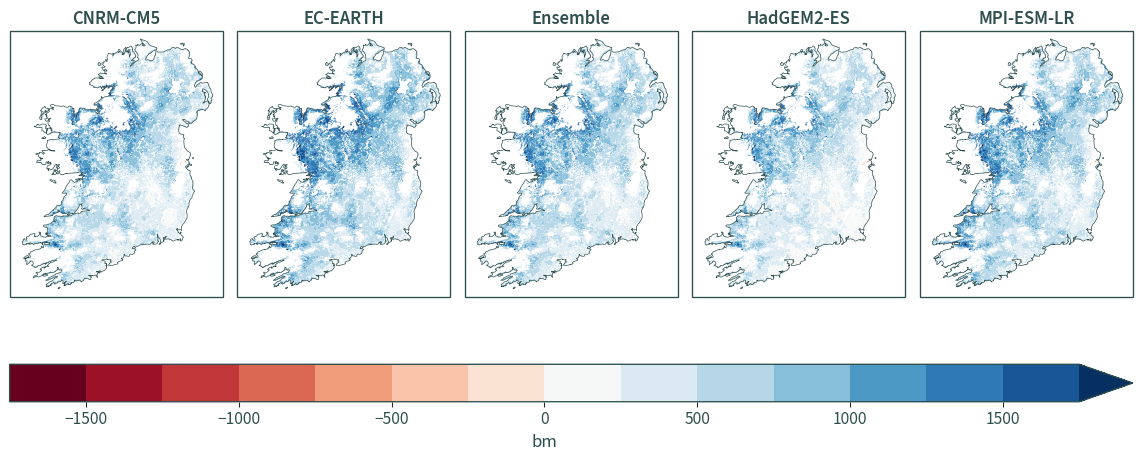

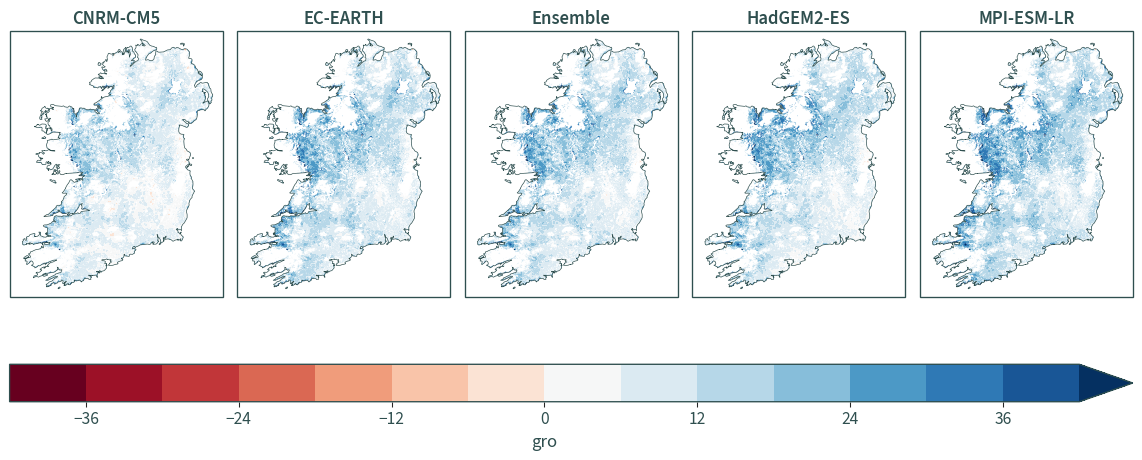

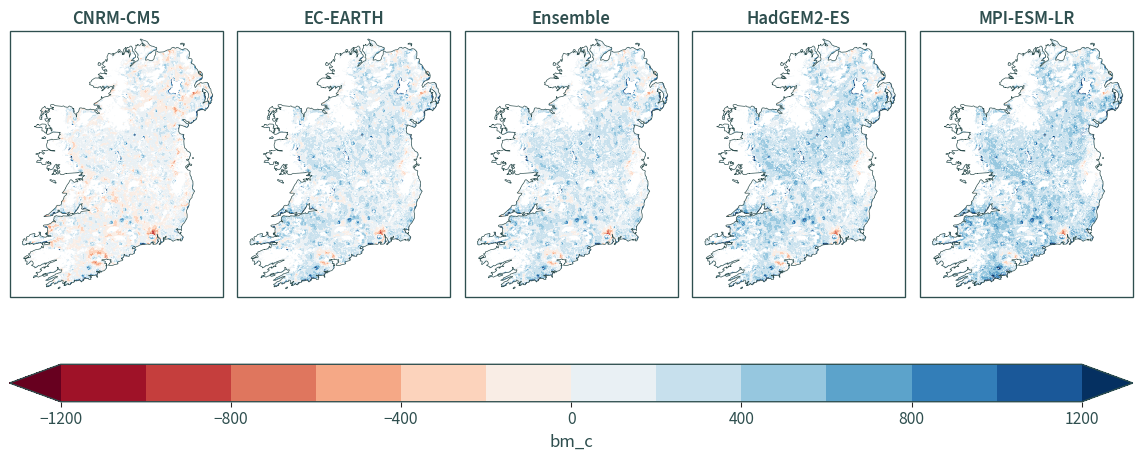

In [54]:
plot_bias(bias_abs_ec_mean_ens)

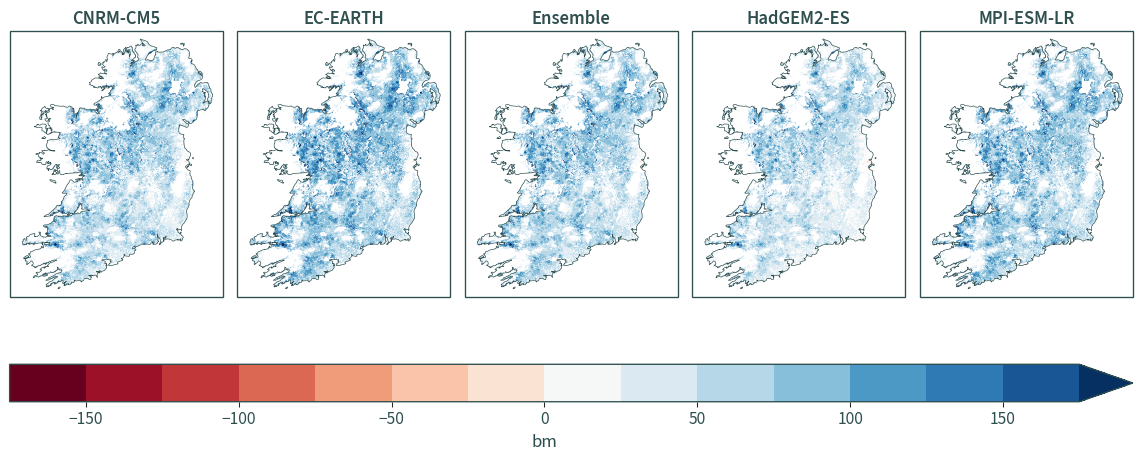

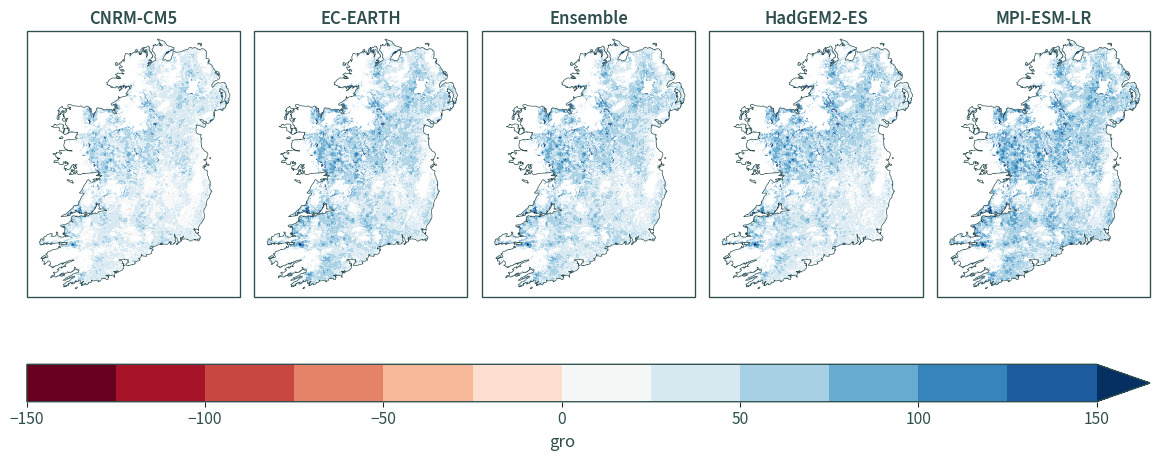

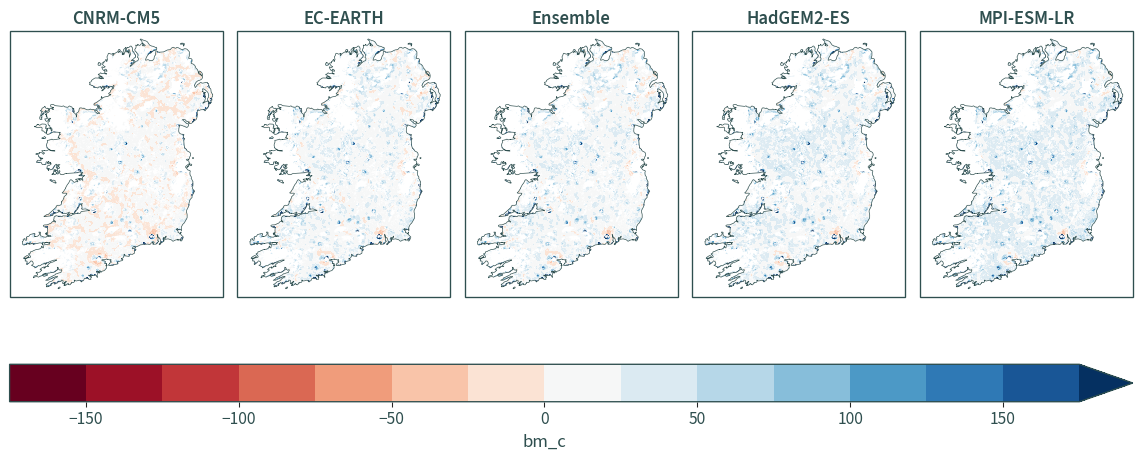

In [55]:
plot_bias(bias_rel_ec_mean_ens)